In [91]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
%matplotlib inline

dataset = pd.read_csv("weather-data.csv")
# change the "valid" column value type from object to datetime
dataset['valid'] = pd.to_datetime(dataset['valid'])
dataset.head() # Show the first five results.


,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30:00,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30:00,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00:00,21.0,12.0,56.38,16.0,NaN,NaN


In [92]:
# We do not need the peak_wind_drct so remove them.
# We also dont need gust because it didnot happend very often based on EDA so we will remove this colomn as well
# We will also remove all other columns which we dont need ( I want predict only temperature based on day)
dataset.drop(columns=["peak_wind_drct", "gust"," station","dwpc","relh","sknt"], inplace=True)
dataset.head()

,valid,tmpc
0,2015-01-01 00:00:00,21.0
1,2015-01-01 00:30:00,21.0
2,2015-01-01 01:00:00,21.0
3,2015-01-01 01:30:00,21.0
4,2015-01-01 02:00:00,21.0


In [93]:
#For our future prediction we dont need temperature each 30 minutes so to reduce these ammount of data we should split "valid" column into
#  2 columns: date and time to reduce numbers of rows late
dataset['date'] = pd.to_datetime(dataset['valid']).dt.date
dataset['time'] = pd.to_datetime(dataset['valid']).dt.time
dataset.head()


,valid,tmpc,date,time
0,2015-01-01 00:00:00,21.0,2015-01-01,00:00:00
1,2015-01-01 00:30:00,21.0,2015-01-01,00:30:00
2,2015-01-01 01:00:00,21.0,2015-01-01,01:00:00
3,2015-01-01 01:30:00,21.0,2015-01-01,01:30:00
4,2015-01-01 02:00:00,21.0,2015-01-01,02:00:00


In [94]:
# Now we can remove"valid" column as well
dataset.drop(columns=["valid"], inplace=True)
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tmpc    103678 non-null  float64
 1   date    103713 non-null  object 
 2   time    103713 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.4+ MB


In [95]:
# I want predict only midday temperature based on midday temperature so we will drop other rows
# befor it we need change value for time on string because after we split value is object again for time and date columns
dataset['time'] = dataset['time'].astype("string")
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tmpc    103678 non-null  float64
 1   date    103713 non-null  object 
 2   time    103713 non-null  string 
dtypes: float64(1), object(1), string(1)
memory usage: 2.4+ MB


In [96]:
# now we can remove all rows and leave only temperature at 12PM every day
dataset = dataset.loc[dataset["time"] == "12:00:00"]  
dataset.head()

,tmpc,date,time
24,15.0,2015-01-01,12:00:00
72,17.0,2015-01-02,12:00:00
120,16.0,2015-01-03,12:00:00
168,18.0,2015-01-04,12:00:00
216,18.0,2015-01-05,12:00:00


In [97]:
# Now I'll split date column into 3: day,mounth, year

dataset['yyyy'] = pd.to_datetime(dataset['date']).dt.year
dataset['mm'] = pd.to_datetime(dataset['date']).dt.month
dataset['dd'] = pd.to_datetime(dataset['date']).dt.day
#dataset.drop(columns=["date"], inplace=True)
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 24 to 103689
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    2170 non-null   float64
 1   date    2171 non-null   object 
 2   time    2171 non-null   string 
 3   yyyy    2171 non-null   int64  
 4   mm      2171 non-null   int64  
 5   dd      2171 non-null   int64  
dtypes: float64(1), int64(3), object(1), string(1)
memory usage: 118.7+ KB


In [98]:
#after it we dont need date column and can delete it, as a time column
dataset.drop(columns=["date","time"], inplace=True)
dataset.head()

,tmpc,yyyy,mm,dd
24,15.0,2015,1,1
72,17.0,2015,1,2
120,16.0,2015,1,3
168,18.0,2015,1,4
216,18.0,2015,1,5


In [99]:
# We can drop year column because we will predict temperature for days
dataset.drop(columns=["yyyy"], inplace=True)
dataset.head()

,tmpc,mm,dd
24,15.0,1,1
72,17.0,1,2
120,16.0,1,3
168,18.0,1,4
216,18.0,1,5


In [100]:
# I want predict temperature for example only for august  in this case I can delete all othere rows for other mounths
dataset = dataset.loc[dataset["mm"] == 8]  
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 9885 to 97889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    185 non-null    float64
 1   mm      185 non-null    int64  
 2   dd      185 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.8 KB


In [101]:
# finally we can remove mounth column as well
dataset.drop(columns=["mm"], inplace=True)
dataset.head()

,tmpc,dd
9885,10.0,1
9933,14.0,2
9977,14.0,3
10058,14.0,5
10098,11.0,6


In [102]:
x_train, x_test, y_train, y_test = train_test_split(dataset["dd"], dataset["tmpc"], test_size = 0.2)

x_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 148 entries, 10416 to 10728
Series name: dd
Non-Null Count  Dtype
--------------  -----
148 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB


In [103]:
x_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 37 entries, 27613 to 11151
Series name: dd
Non-Null Count  Dtype
--------------  -----
37 non-null     int64
dtypes: int64(1)
memory usage: 592.0 bytes


In [104]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 148 entries, 10416 to 10728
Series name: tmpc
Non-Null Count  Dtype  
--------------  -----  
148 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [105]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 37 entries, 27613 to 11151
Series name: tmpc
Non-Null Count  Dtype  
--------------  -----  
37 non-null     float64
dtypes: float64(1)
memory usage: 592.0 bytes


Text(0, 0.5, 'Temperature')

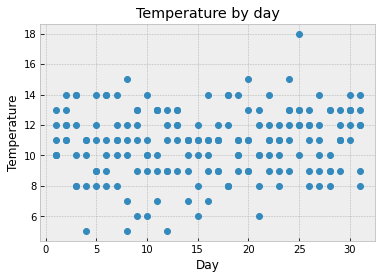

In [106]:
plt.plot(dataset["dd"], dataset["tmpc"], 'o')
plt.title("Temperature by day")
plt.xlabel("Day")
plt.ylabel("Temperature")

In [135]:
X, y = make_regression(n_samples=185, n_features=10, noise=100, random_state=42)
trainX, testX, trainY, testY = train_test_split(dataset[["dd"]], dataset["tmpc"], test_size=0.2)


In [136]:
model = LinearRegression()

model.fit(trainX, trainY)

LinearRegression()

In [137]:
model.score(testX, testY)


-0.032124465560836146

In [138]:
 y_pred=model.predict([[x]])
print(y,sep='\n')


   

[ 4.62821369e+02  5.24447744e+01  1.33972864e+02 -8.04671033e+01
  1.39097879e+02  1.16846235e+01  2.60750667e+02  2.95973458e+02
 -3.14447486e+02  2.57479298e+02  2.80044708e+02  3.13892065e+02
  6.44987461e+01  4.94390903e+01  1.22341641e+02  1.22072595e+02
  2.55589722e+01  1.36627238e+02  1.58858600e+02  6.56555544e+01
  3.03619543e+02  1.46567672e+01 -2.62906509e+01 -3.55399236e+02
  7.72832543e+01  1.15445669e+02  1.02652452e+02  3.09808692e+01
 -4.77531576e+02  3.04412731e+02  3.05213215e+02  3.12260873e+02
  2.78823332e+01 -1.50590028e+02 -2.63388909e+02  8.47281748e+01
  7.46236133e+01 -2.88640807e+00  1.73576042e+02  2.60064129e+02
 -3.52634462e+01  3.83801969e+02  5.86454938e+01 -2.34919900e+01
  8.84875841e+01  4.29146905e+02 -5.66513801e+02  1.07091130e+02
 -3.62597931e+02  1.84280410e+01 -6.16837403e-02  2.43723796e+02
 -1.39925657e+02  1.08364993e+02 -2.45756571e+02 -1.79293996e+02
  2.14591876e+02 -7.94506268e+01  1.69651869e+02 -8.27439303e+01
 -7.32715739e+01  1.65593

c:\Users\viken\Downloads\MSA2022.Phase2.DataScience\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
